In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests as req
from pprint import pprint
import os, json, csv, time, random, datetime, time 
from config import api_key
from citipy import citipy
import openweathermapy as ow


In [2]:
# Assign the Cities' file to a variable 
cities_file = os.path.join(".", "Resources", "cities.csv")

### Create a list of cities for analysis

In [3]:
# Create lists with the complete latitudes and longitudes to better analysis accuracy. 
lat = [y for y in range (-88, 93, 5)]
lng = [x for x in range (-178, 188, 10)]

# Store the cities in a collection/set. This way we be sure we won't have any duplication.
collection = set()
# Line terminator to append to each city
lineterminator = '\r\n'
# Looping combining Latitudes and Longitudes to get cities 
for y in lat:
    for x in lng:
        # Get the nearest city of current latitude and longitude
        rand_y = random.uniform( (y-2), (y+2) )
        rand_x = random.uniform( (x-2), (x+2) )
        city = citipy.nearest_city(y,x)
        collection.add(f"{city.city_name},{city.country_code}{lineterminator}")
#         print(f"City: {city.city_name}, Country:{city.country_code}, coord: {y},{x}")

# Preview total of cities 
print(f"Total of distinct cities: {len(collection)}")

Total of distinct cities: 598


In [4]:
# Save the selected cities in a csv file.
with open(cities_file, 'w') as writeFile:
    # Write the header
    writeFile.write(f"City,Country{lineterminator}")
    # Write the cities
    writeFile.writelines(collection)
        

In [5]:
# Read the cities file
cities = pd.read_csv(cities_file, sep=',') # columns=["city","country"], 
# Convert the selected cities to a DataFrame
df_cities = pd.DataFrame(cities)
# Preview the DataFrame
df_cities.head()


,City,Country
0,winnemucca,us
1,chaa-khol,ru
2,yirol,sd
3,san mariano,ph
4,clyde river,ca


In [6]:
# Create the new fields for city.
df_cities["Cloudiness"] = ""
df_cities["Date"] = ""
df_cities["Humidity"] = 0
df_cities["Lat"] = 0.0
df_cities["Lng"] = 0.0
df_cities["Max Temp"] = 0.0
df_cities["Wind Speed"] = 0.0

# Set units to get the temperature in fahrenheit
units = "imperial"

# Set the default URL.
url = f"http://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units={units}"

In [7]:

# Looping to fill new fields. 
count = 0 

print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")       

for index, row in df_cities.iterrows(): 
#     if count == 5:
#         break
    # Add a one second interval between queries to stay within API query limits
    #####################################################
    time.sleep(1) #####################################################
    #####################################################
    count += 1
    # Build query URL and print log
    city_country = f"{row['City']},{row['Country']}" 
    # Append the current city to the URL
    query_url = f"{url}&q={city_country}"
    print(f"Processing Record {count} - ({city_country.replace(',','/')})")
    print(query_url)
    
    try:
        # Run the request
        temp = req.get(query_url).json()
        # Fill fields
        df_cities.loc[index, 'Cloudiness'] = temp['clouds']['all']
        df_cities.loc[index, 'Date'] = datetime.datetime.fromtimestamp( int(temp['dt']) ).strftime('%Y-%m-%d %H:%M:%S')
        df_cities.loc[index, 'Humidity'] = temp['main']['humidity']
        df_cities.loc[index, 'Lat'] = temp['coord']["lat"]
        df_cities.loc[index, 'Lng'] = temp['coord']["lon"]
        df_cities.loc[index, 'Max Temp'] = temp['main']['temp_max']
        df_cities.loc[index, 'Wind Speed'] = temp['wind']['speed']
    except Exception as e:    
        print(f"We've got ther error message {e} when processing city={city_country} - {temp}.")
        # Lets remove the current city from DF.
        df_cities.drop([index],inplace=True)

    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")       
        
        
# Remove any City missing data
df_cities.dropna(how="any", inplace=True)  
# Reindex DF
df_cities.reset_index(drop=True, inplace=True)   
# Preview total cities
print(f"Total cities remaining: {len(df_cities)}")


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 - (winnemucca/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=winnemucca,us
Processing Record 2 - (chaa-khol/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=chaa-khol,ru
We've got ther error message ['clouds'] when processing city=chaa-khol,ru - {'cod': '404', 'message': 'city not found'}.
Processing Record 3 - (yirol/sd)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=yirol,sd
We've got ther error message ['clouds'] when processing city=yirol,sd - {'cod': '404', 'message': 'city not found'}.
Processing Record 4 - (san mariano/ph)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=san mariano,ph
Processing Record 5 - (clyde river/ca)
http://api.openweathermap.or

Processing Record 50 - (salvador/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=salvador,br
Processing Record 51 - (benguela/ao)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=benguela,ao
Processing Record 52 - (marabba/sd)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=marabba,sd
Processing Record 53 - (port-cartier/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=port-cartier,ca
Processing Record 54 - (darnah/ly)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=darnah,ly
Processing Record 55 - (rocha/uy)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=rocha,uy
Processing Record 56 - (oudtshoorn/za)
http://api.openweathermap.org/data/2.5/weather?APPID=

Processing Record 101 - (comodoro rivadavia/ar)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=comodoro rivadavia,ar
Processing Record 102 - (recodo/ph)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=recodo,ph
Processing Record 103 - (baruun-urt/mn)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=baruun-urt,mn
Processing Record 104 - (stephenville/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=stephenville,us
Processing Record 105 - (okhotsk/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=okhotsk,ru
Processing Record 106 - (berlevag/no)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=berlevag,no
Processing Record 107 - (ponta delgada/pt)
http://api.op

Processing Record 152 - (ola/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ola,ru
Processing Record 153 - (port-gentil/ga)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=port-gentil,ga
Processing Record 154 - (kamenskoye/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=kamenskoye,ru
We've got ther error message ['clouds'] when processing city=kamenskoye,ru - {'cod': '404', 'message': 'city not found'}.
Processing Record 155 - (zambezi/zm)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=zambezi,zm
Processing Record 156 - (touros/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=touros,br
Processing Record 157 - (bonthe/sl)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b096838

Processing Record 201 - (buseresere/tz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=buseresere,tz
Processing Record 202 - (guajara/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=guajara,br
Processing Record 203 - (bathsheba/bb)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=bathsheba,bb
Processing Record 204 - (dharchula/in)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=dharchula,in
Processing Record 205 - (quiruvilca/pe)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=quiruvilca,pe
Processing Record 206 - (nanortalik/gl)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=nanortalik,gl
Processing Record 207 - (nantucket/us)
http://api.openweathermap.org

Processing Record 250 - (sorvag/fo)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=sorvag,fo
We've got ther error message ['clouds'] when processing city=sorvag,fo - {'cod': '404', 'message': 'city not found'}.
Processing Record 251 - (attawapiskat/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=attawapiskat,ca
We've got ther error message ['clouds'] when processing city=attawapiskat,ca - {'cod': '404', 'message': 'city not found'}.
Processing Record 252 - (natal/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=natal,br
Processing Record 253 - (cerrito/py)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=cerrito,py
Processing Record 254 - (grindavik/is)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=grindavi

Processing Record 298 - (pospelikha/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=pospelikha,ru
Processing Record 299 - (taitung/tw)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=taitung,tw
Processing Record 300 - (krasnoselkup/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=krasnoselkup,ru
We've got ther error message ['clouds'] when processing city=krasnoselkup,ru - {'cod': '404', 'message': 'city not found'}.
Processing Record 301 - (bonavista/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=bonavista,ca
Processing Record 302 - (puerto escondido/mx)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=puerto escondido,mx
Processing Record 303 - (broken hill/au)
http://api.openweathermap.org/data/2.5/wea

Processing Record 348 - (ruatoria/nz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ruatoria,nz
We've got ther error message ['clouds'] when processing city=ruatoria,nz - {'cod': '404', 'message': 'city not found'}.
Processing Record 349 - (souillac/mu)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=souillac,mu
Processing Record 350 - (saldanha/za)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=saldanha,za
Processing Record 351 - (san martin/ar)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=san martin,ar
Processing Record 352 - (sukhoy log/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=sukhoy log,ru
Processing Record 353 - (wahiawa/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012b

Processing Record 397 - (neiafu/to)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=neiafu,to
Processing Record 398 - (sveti nikole/mk)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=sveti nikole,mk
Processing Record 399 - (carnarvon/au)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=carnarvon,au
Processing Record 400 - (udachnyy/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=udachnyy,ru
Processing Record 401 - (grand river south east/mu)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=grand river south east,mu
We've got ther error message ['clouds'] when processing city=grand river south east,mu - {'cod': '404', 'message': 'city not found'}.
Processing Record 402 - (taolanaro/mg)
http://api.openweathermap.or

Processing Record 444 - (bumba/cd)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=bumba,cd
Processing Record 445 - (pelym/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=pelym,ru
Processing Record 446 - (amderma/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=amderma,ru
We've got ther error message ['clouds'] when processing city=amderma,ru - {'cod': '404', 'message': 'city not found'}.
Processing Record 447 - (parana/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=parana,br
Processing Record 448 - (kamenka/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=kamenka,ru
Processing Record 449 - (hami/cn)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q

Processing Record 491 - (barentsburg/sj)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=barentsburg,sj
We've got ther error message ['clouds'] when processing city=barentsburg,sj - {'cod': '404', 'message': 'city not found'}.
Processing Record 492 - (albany/au)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=albany,au
Processing Record 493 - (florianopolis/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=florianopolis,br
Processing Record 494 - (nur/ir)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=nur,ir
We've got ther error message ['clouds'] when processing city=nur,ir - {'cod': '404', 'message': 'city not found'}.
Processing Record 495 - (berga/es)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=berga,es
P

Processing Record 540 - (gravdal/no)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=gravdal,no
Processing Record 541 - (meridian/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=meridian,us
Processing Record 542 - (samana/do)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=samana,do
We've got ther error message ['clouds'] when processing city=samana,do - {'cod': '404', 'message': 'city not found'}.
Processing Record 543 - (bakchar/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=bakchar,ru
Processing Record 544 - (zhigansk/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=zhigansk,ru
Processing Record 545 - (coihaique/cl)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&

Processing Record 589 - (aflu/dz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=aflu,dz
We've got ther error message ['clouds'] when processing city=aflu,dz - {'cod': '404', 'message': 'city not found'}.
Processing Record 590 - (portree/gb)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=portree,gb
Processing Record 591 - (meyungs/pw)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=meyungs,pw
We've got ther error message ['clouds'] when processing city=meyungs,pw - {'cod': '404', 'message': 'city not found'}.
Processing Record 592 - (belmonte/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=belmonte,br
Processing Record 593 - (kuryk/kz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=kuryk,kz
Processing Record 

In [8]:
# Preview new fields filled
df_cities.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,winnemucca,us,1,2019-07-03 10:45:44,41,40.97,-117.74,62.01,13.87
1,san mariano,ph,87,2019-07-03 10:45:47,93,16.98,122.01,75.83,1.90
2,clyde river,ca,40,2019-07-03 10:44:42,80,70.47,-68.59,41.00,14.99
3,sisimiut,gl,57,2019-07-03 10:45:49,89,66.94,-53.67,39.11,20.07
4,caribou,us,90,2019-07-03 10:45:51,88,46.86,-68.01,68.00,3.36


In [9]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
City          520 non-null object
Country       520 non-null object
Cloudiness    520 non-null int64
Date          520 non-null object
Humidity      520 non-null int64
Lat           520 non-null float64
Lng           520 non-null float64
Max Temp      520 non-null float64
Wind Speed    520 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 36.6+ KB


### Latitude vs Temperature Plot

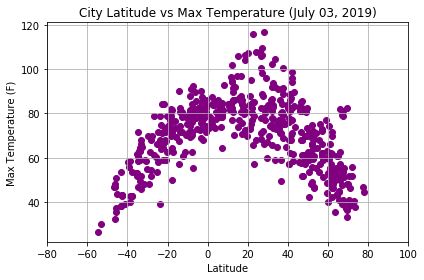

In [10]:
# Set Latitude for x axis
x_axis = df_cities["Lat"].tolist()
# Set Max Temperature for y axis
y_axis = df_cities["Max Temp"].tolist()

# Set Line Trend
# z = np.polyfit(x_axis, y_axis, 1)
# p = np.poly1d(z)
# plt.plot(x_axis,p(x_axis),"g--")

plt.grid(True)

plt.scatter(x_axis, y_axis, marker="o",color="purple")


# Set x and y limits
plt.xlim(-80, 100)
# plt.ylim(-100, 150)

# Set Title 
# Get the analysis date and format it
analisys_date = df_cities.loc[0:0]["Date"][0]
analisys_date = analisys_date[0:10]
dt = datetime.datetime.strptime(analisys_date, '%Y-%m-%d')
analisys_date = dt.strftime("%B %d, %Y")
plt.title(f"City Latitude vs Max Temperature ({analisys_date})")

# Set labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the Figure
# plt.savefig("tumor_response_to_treatment.png")

# Show the Figure
plt.tight_layout()
plt.show()




### Latitude vs. Humidity Plot

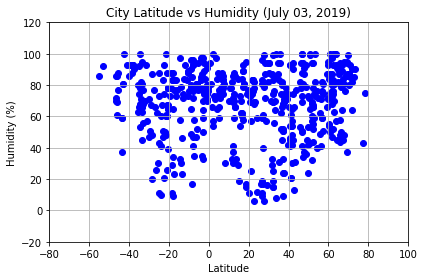

In [13]:
# Set Latitude for x axis
x_axis = df_cities["Lat"].tolist()
# Set Max Temperature for y axis
y_axis = df_cities["Humidity"].tolist()

# Set Line Trend
# z = np.polyfit(x_axis, y_axis, 1)
# p = np.poly1d(z)
# plt.plot(x_axis,p(x_axis),"g--")

plt.grid(True)

plt.scatter(x_axis, y_axis, marker="o",color="blue")


# Set x and y limits
plt.xlim(-80, 100)
plt.ylim(-20, 120)

# Set Title 
plt.title(f"City Latitude vs Humidity ({analisys_date})")

# Set labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the Figure
# plt.savefig("tumor_response_to_treatment.png")

# Show the Figure
plt.tight_layout()
plt.show()



### Latitude vs. Cloudiness Plot

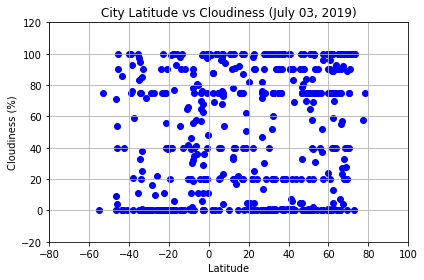

In [14]:
# Set Latitude for x axis
x_axis = df_cities["Lat"].tolist()
# Set Max Temperature for y axis
y_axis = df_cities["Cloudiness"].tolist()

# Set Line Trend
# z = np.polyfit(x_axis, y_axis, 1)
# p = np.poly1d(z)
# plt.plot(x_axis,p(x_axis),"g--")

plt.grid(True)

plt.scatter(x_axis, y_axis, marker="o",color="blue")


# Set x and y limits
plt.xlim(-80, 100)
plt.ylim(-20, 120)

# Set Title 
plt.title(f"City Latitude vs Cloudiness ({analisys_date})")

# Set labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the Figure
# plt.savefig("tumor_response_to_treatment.png")

# Show the Figure
plt.tight_layout()
plt.show()
